In [27]:
# DAL Library
# version 0.1.0

source("load_harbinger.R")

#loading Harbinger
load_harbinger() # see ../load_harbinger.R 

In [28]:
#loading the example database
data(har_examples)

In [29]:
#Using the time series 1 
dataset <- har_examples[[1]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,1.0000000,FALSE
2,0.9689124,FALSE
3,0.8775826,FALSE
4,0.7316889,FALSE
5,0.5403023,FALSE
6,0.3153224,FALSE


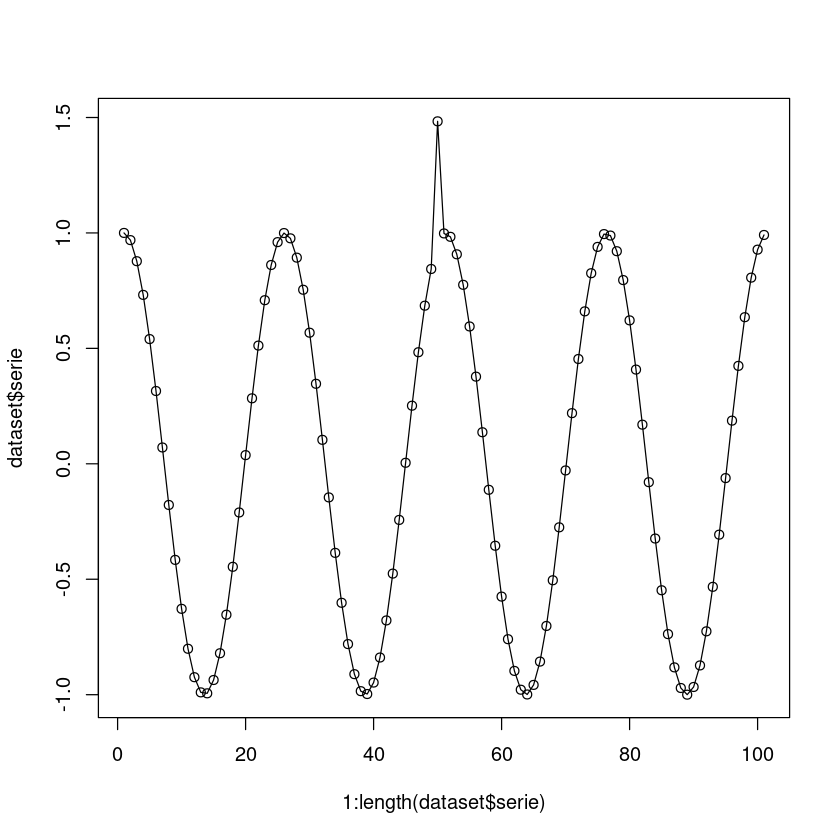

In [30]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [31]:
# establishing arima method 
  load_library("nnet")
  model <- har_tsreg_sw(ts_mlp(ts_gminmax(), input_size=5, size=3, decay=0))

In [32]:
# fitting the model
  model <- fit(model, dataset$serie)

ts_mlp,0.000



[1] "ts_mlp"


In [33]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [34]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  24  TRUE anomaly
2  49  TRUE anomaly
3  74  TRUE anomaly
4  99  TRUE anomaly


In [35]:
# evaluating the detections using hard evaluation
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     4    
FALSE     1     96   


In [36]:
# evaluating the detections using hard evaluation
  soft_evaluation <- evaluate(model, detection$event, dataset$event, evaluation = soft_evaluation(sw=5))
  print(soft_evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0.8   3.2  
FALSE     0.2   96.8 
